In [14]:
import os
import sys
import numpy as np
import time
import pygmt
import pandas as pd
import math
import matplotlib.pyplot as plt
import obspy
from obspy import read_inventory
sys.path.append('../lib')
import setup_paths
paths = setup_paths.paths
from SAM import RSAM
#from ASL import inventory2seedids

def inventory2seedids(inv, chancode='', force_location_code='*'):
    seed_ids = list()

    for networkObject in inv:
        if chancode:
            networkObject = networkObject.select(channel=chancode)
        stationObjects = networkObject.stations

        for stationObject in stationObjects:
            channelObjects = stationObject.channels
            for channelObject in channelObjects:
                this_seed_id = networkObject.code + '.' + stationObject.code + f'.{force_location_code}.' \
                            + channelObject.code
                seed_ids.append(this_seed_id)
    
    return seed_ids

def whakaari_map(show=False, zoom_level=0, inv=None, add_labels=False, centerlon=-62.177, \
                 centerlat=16.711, contour_interval=100, topo_color=True):
    #define etopo data file
    # topo_data = 'path_to_local_data_file'
    #topo_data = '@earth_relief_30s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)
    # topo_data = '@earth_relief_15s' #15 arc second global relief (SRTM15+V2.1)
    topo_data = '@earth_relief_03s' #3 arc second global relief (SRTM3S)
    
    # define plot geographical range
    diffdeglat = 0.08/(2**zoom_level)
    diffdeglon = diffdeglat/np.cos(np.deg2rad(centerlat))
    minlon, maxlon = centerlon-diffdeglon, centerlon+diffdeglon  #-62.25, -62.13
    minlat, maxlat = centerlat-diffdeglat, centerlat+diffdeglat  # 16.66, 16.83
    region=[minlon, maxlon, minlat, maxlat]


    
    # Visualization
    fig = pygmt.Figure()
    

        
    grid = pygmt.datasets.load_earth_relief(resolution="03s", 
       region=region)

    land = grid * pygmt.grdlandmask(region=region, 
         spacing="03s", 
         maskvalues=[0, 1], 
         resolution="f")
    wet = grid * pygmt.grdlandmask(region=region, 
         spacing="03s", 
         maskvalues=[1, "NaN"], 
         resolution="f")

    # make color pallets
    '''
    pygmt.makecpt(
        cmap='topo',
        series='-1300/1300/%d' % contour_interval,
        continuous=True
    )'''

    # plot high res topography
    '''
    fig.grdimage(
        grid=topo_data,
        region=[minlon, maxlon, minlat, maxlat],
        projection='M4i',
        shading=True,
        frame=True
        )
    '''
    fig.grdimage(grid=grid, projection="M15c", cmap="geo", frame=True, shading=True)
    '''
    fig.grdimage(grid=land, projection="M15c", 
         cmap="dem1", shading=True) 
         '''
    fig.colorbar(frame=["a10", "x+lElevation", "y+lm"])
    '''
    # Plot water (NaN transparent)
    fig.grdimage(grid=wet, 
         cmap="seafloor", nan_transparent=True)
    '''
    
    # plot continents, shorelines, rivers, and borders
    '''
    fig.coast(
        region=region,
        projection='M4i',
        shorelines=True,
        frame=True
        )
    '''
    
    fig.coast(shorelines=True, projection="M15c", 
        region=region, resolution="f")
    fig.coast(rivers="1/0.5p,blue") # Rivers
    
    # plot the topographic contour lines
    '''
    fig.grdcontour(
        grid=topo_data,
        interval=contour_interval,
        #annotation="%d+f6p" % contour_interval,
        #limit="-1300/1300", #to only display it below 
        limit="0/1300"
        pen="a0.15p"
        )
    
    if topo_color:
        fig.colorbar(
            frame='+l"Topography"',
        #     position="x11.5c/6.6c+w6c+jTC+v" #for vertical colorbar
            )
            '''
    
    if inv:
        seed_ids = inventory2seedids(inv, force_location_code='10')
        stalat = []
        stalon = []
        for seed_id in seed_ids:
            print(seed_id)
            try:
                coords = inv.get_coordinates(seed_id)
            except:
                continue
            else:
                stalat.append(coords['latitude'])
                stalon.append(coords['longitude'])
        fig.plot(x=stalon, y=stalat, style="s0.4c", fill="dodgerblue4", pen='2p,blue')  
        
        if add_labels:
            #print('Adding station labels')
            for thislat, thislon, this_id in zip(stalat, stalon, seed_ids):
                net, sta, loc, chan = this_id.split('.')
                #print(thislat, thislon, net, sta, loc, chan)
                fig.text(x=thislon, y=thislat, text=sta, textfiles=None, \
                        font="blue",
                        justify="ML",
                        offset="0.2c/0c",)
    
    if show:
        fig.show();


    return fig


inv = read_inventory(os.path.join(paths['RESPONSE_DIR'],'NZ.xml'), format='stationxml')
startt = obspy.UTCDateTime(2019,12,1)
endt = obspy.UTCDateTime(2020,12,12)
inv = inv.select(starttime=startt, endtime=endt)
inv = inv.select(channel='*Z')
inv = inv.select(channel='H*')
lat = - (37 + 31/60 + 17/3600)
lon = (177 + 11/60 + 6/3600)
source = {'lat':lat, 'lon':lon}
print(source)


{'lat': -37.521388888888886, 'lon': 177.185}


grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from 170.729531633 to 170.729166667
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 183.640468367 to 183.640833333
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from -42.6413888889 to -42.6416666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from -32.4013888889 to -32.4008333333
grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 3x3 arc seconds tiles provided by SRTMGL3 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_03s_g): S43E170
grdlandmask [WARNING]: (x_ma

NZ.OPCS.10.HNZ
NZ.WIZ.10.HHZ
NZ.WKHS.10.HNZ
NZ.WSRZ.10.HHZ


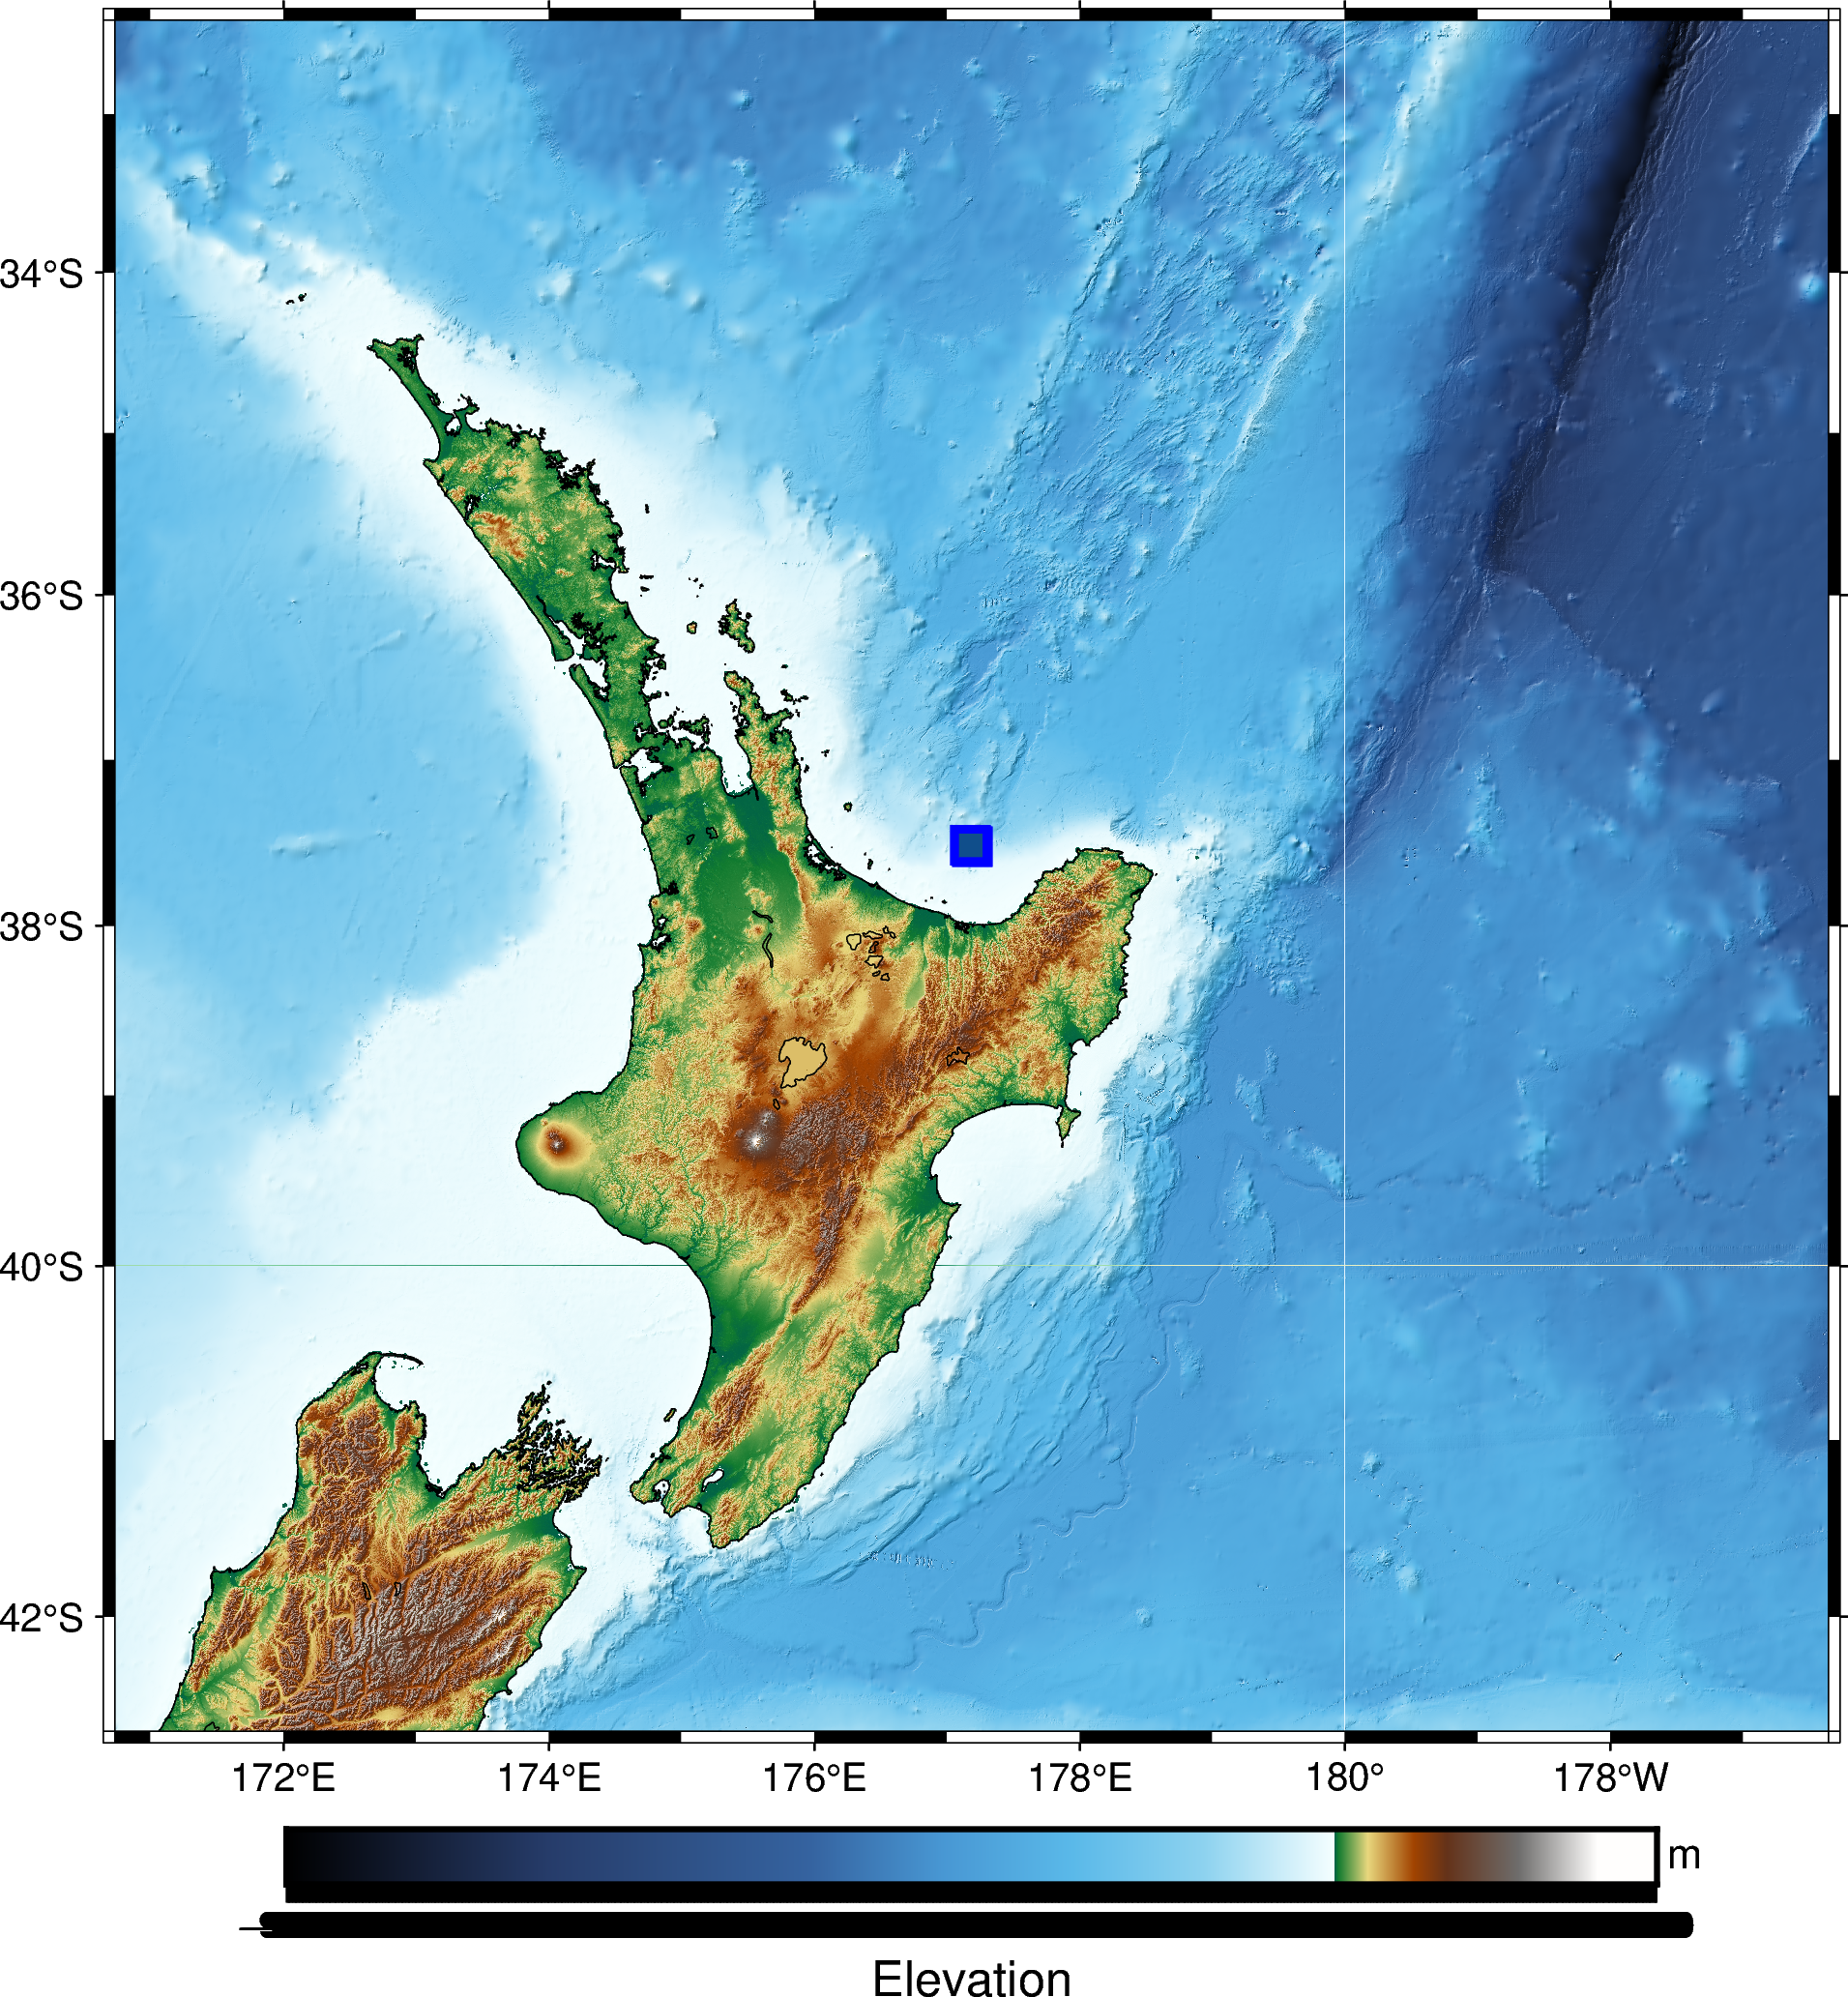

In [18]:
whakaari_map(inv=inv, show=True, add_labels=False, centerlon=source['lon'], centerlat=source['lat'], \
                      zoom_level=-6);


In [ ]:
startt = obspy.UTCDateTime(2013,7,1)
endt = obspy.UTCDateTime(2013,9,1)
rsamObj = RSAM.read(startt, endt, SAM_DIR=paths['SAM_DIR'], sampling_interval=60, ext='pickle')  
rsamObj.plot(metrics='mean')

grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from 173.957265817 to 173.956666667
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 180.412734183 to 180.413333333
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from -40.0813888889 to -40.0816666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from -34.9613888889 to -34.9608333333
grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 3x3 arc seconds tiles provided by SRTMGL3 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_03s_g): S41E173


173.95726581667222 180.41273418332779 -40.08138888888889 -34.961388888888884


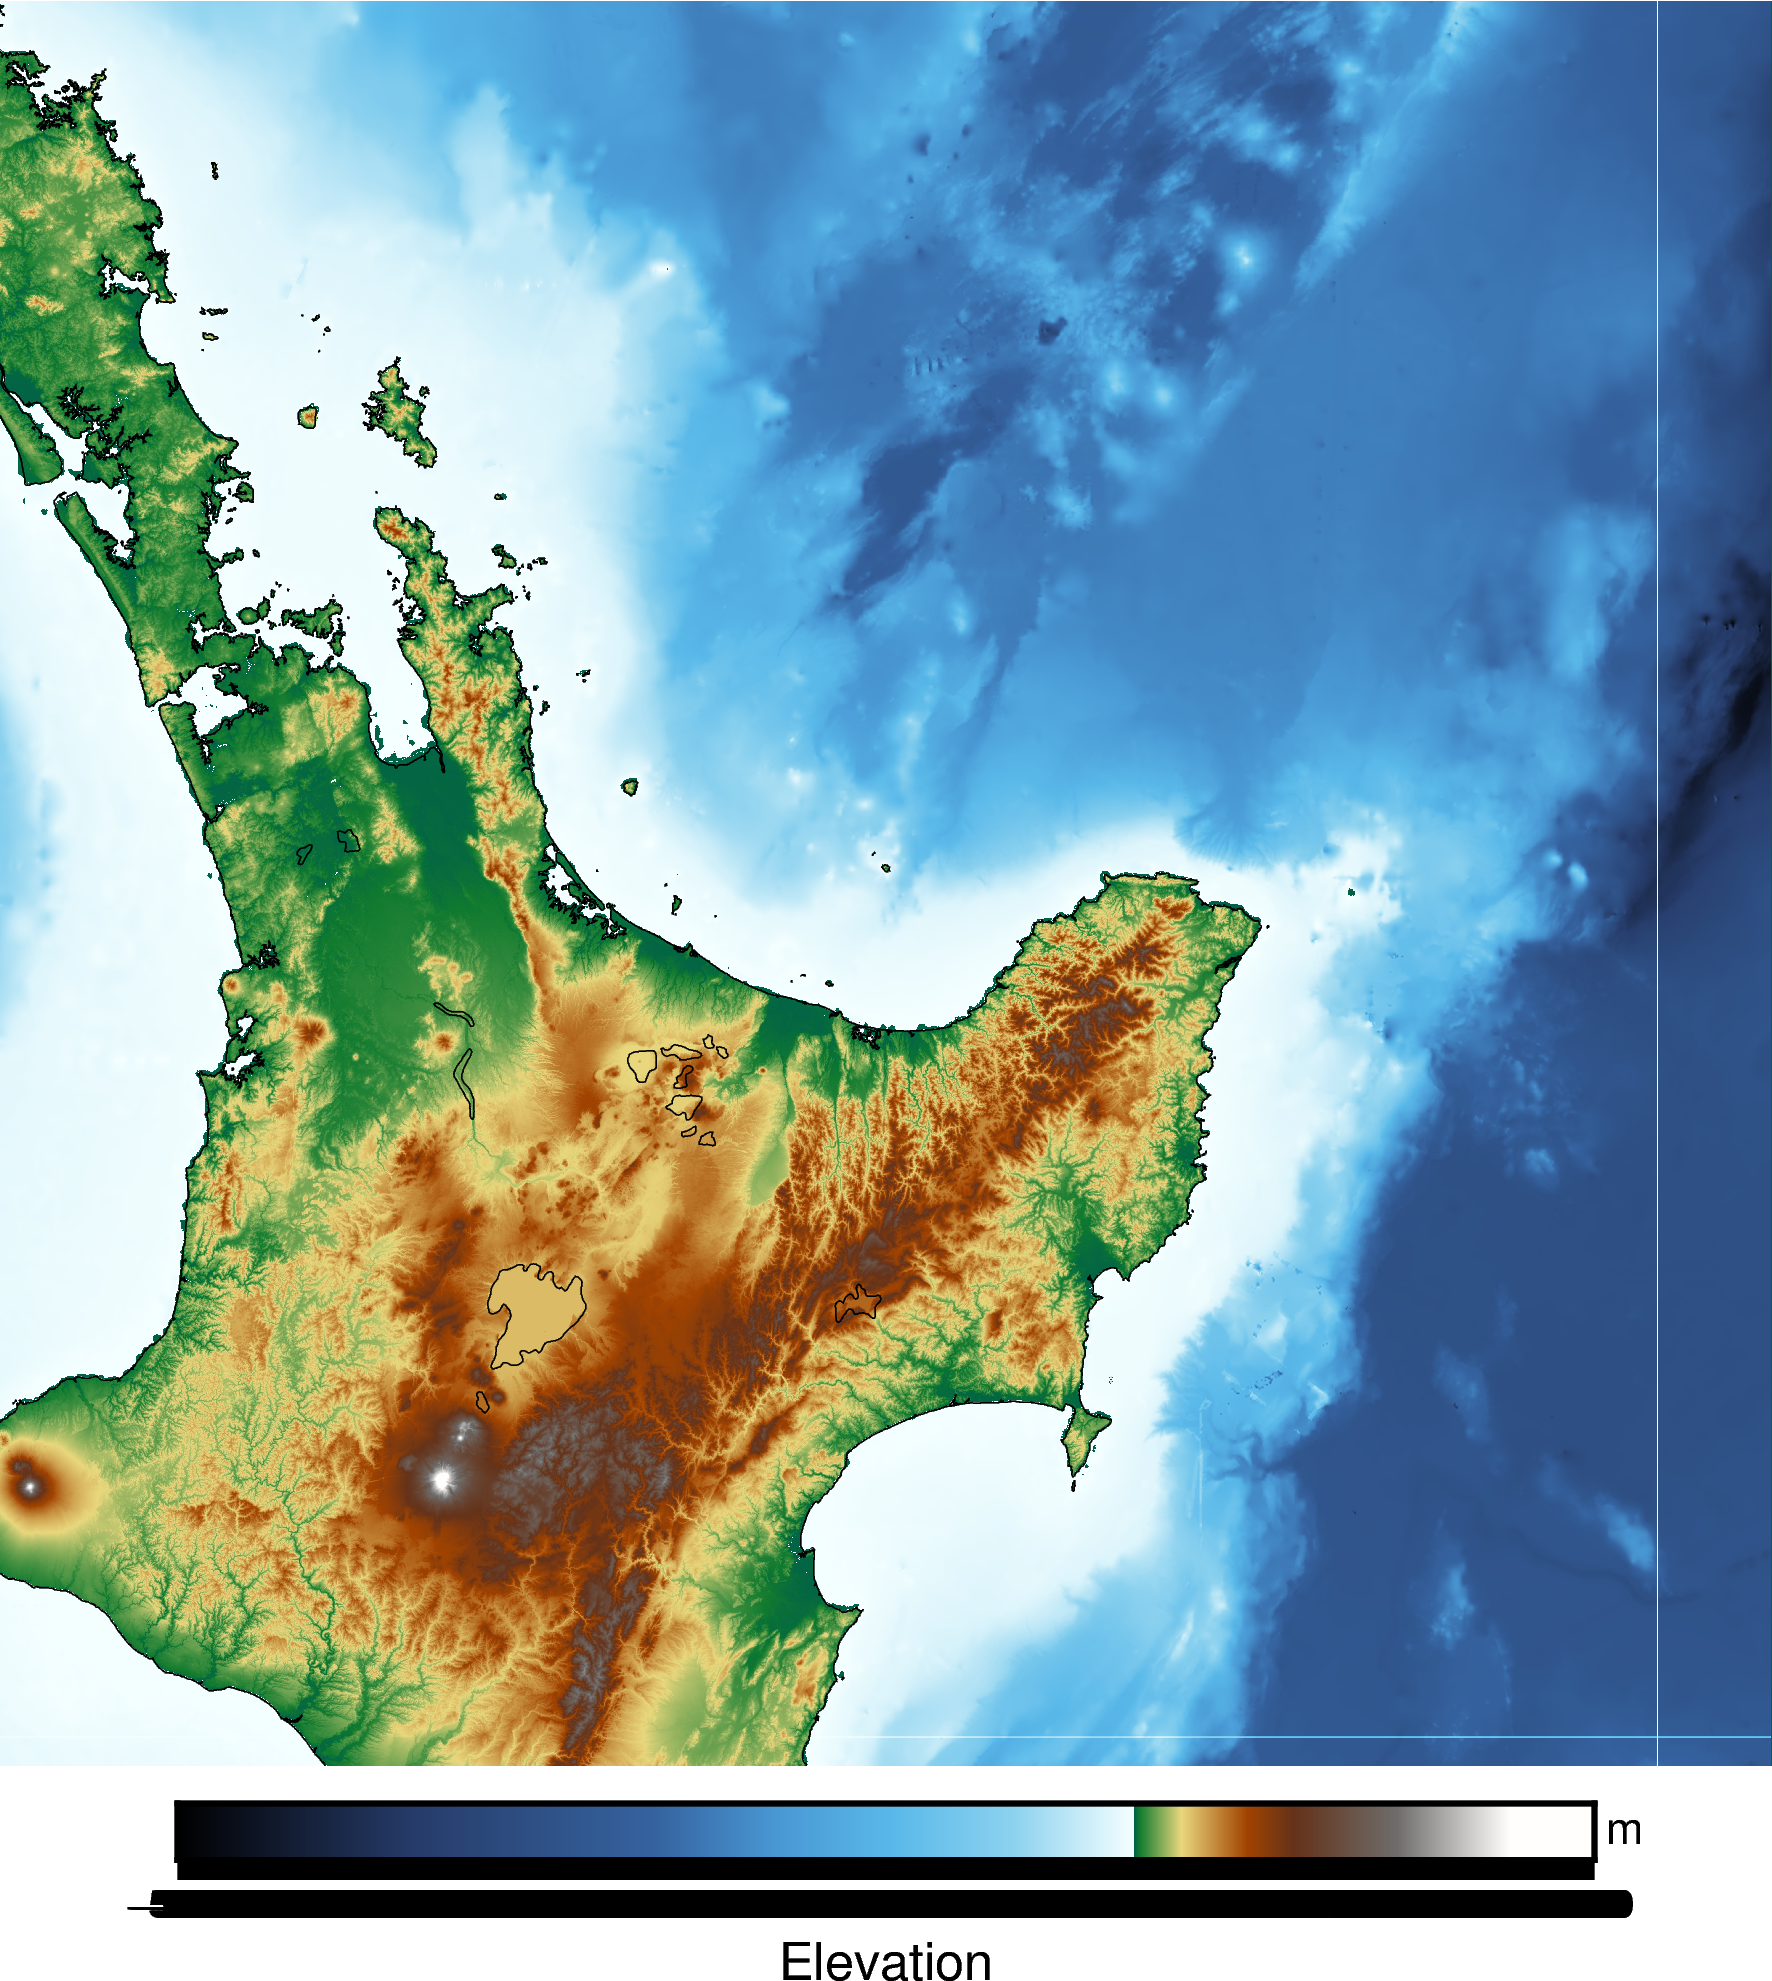

In [13]:
region = whakaari_map(inv=inv, show=True, add_labels=True, centerlon=source['lon'], centerlat=source['lat'], zoom_level=-5);
#whakaari_map(inv=inv, show=True, add_labels=True, centerlon=source['lon'], centerlat=source['lat'], zoom_level=3);
grid = pygmt.datasets.load_earth_relief(resolution="03s", 
       region=region)
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M15c", cmap="geo")
fig.colorbar(frame=["a10", "x+lElevation", "y+lm"])
fig.coast(shorelines=True, region=region, resolution="f")
fig.show()

In [ ]:
t = [obspy.UTCDateTime(this_time) for this_time in rsamObj.dataframes['NZ.WIZ.10.HHZ'].time]

In [ ]:
rsamObj.plot(metrics='bands')